# Question 6
Are there artists with a significant time gap between
performances and then made a comeback?

# 1. Import Required Libraries

In [40]:
# Import the json module for handling JSON data (parsing and creating JSON objects)
import json

# Import defaultdict from the collections module to create dictionaries with default values
from collections import defaultdict

# Import matplotlib.pyplot for plotting data (used for creating visualizations like graphs)
import matplotlib.pyplot as plt


# 2. Load Festival Data from JSON Files
We will load the festival data from JSON files, which contain information about the artists who performed at each festival in different years.


In [41]:
# Define a function to load data from a JSON file
def load_json(filename):
    # Open the JSON file in read mode ('r')
    with open(filename, 'r') as file:
        # Parse the JSON content from the file and return it as a Python object (dict, list, etc.)
        return json.load(file)


# 3. Finding Artists with Significant Gaps Between Performances
In this step, we will identify artists who had a gap of at least 3 years between performances at any of the festivals. The `find_artists_with_comebacks` function will help us achieve this by calculating the gaps between the years an artist performed.


In [42]:
# Define a function to find artists who had significant gaps between their performances
def find_artists_with_comebacks(festivals_data, gap_threshold=3):
    # Create a defaultdict to store the years when each artist performed
    artist_years = defaultdict(list)
    
    # Collect the years when each artist performed across all festivals
    for festival_name, festival_data in festivals_data.items():
        for year, artists in festival_data.items():
            for artist in artists:
                # Append the year to the artist's list of performance years
                artist_years[artist].append(int(year))
    
    # Initialize a dictionary to store artists who had significant gaps between performances
    artists_with_comebacks = {}
    
    # Iterate over each artist and their performance years
    for artist, years in artist_years.items():
        years.sort()  # Sort the years in ascending order
        
        gaps = []  # List to store the gaps between consecutive performances
        
        # Check for gaps between consecutive performance years
        for i in range(1, len(years)):
            gap = years[i] - years[i-1]  # Calculate the gap between two consecutive years
            if gap >= gap_threshold:  # If the gap is greater than or equal to the threshold, it's a significant gap
                gaps.append(gap)
        
        # If there are any significant gaps, add the artist to the result dictionary
        if gaps:
            artists_with_comebacks[artist] = {
                "years": years,  # List of years when the artist performed
                "gaps": gaps     # List of significant gaps between performances
            }
    
    # Return the dictionary of artists with comebacks
    return artists_with_comebacks


# 4. Loading Data for All Festivals
We now load the data for all the festivals (Rock Werchter, Pokkelpop, and Graspop) and aggregate it into a dictionary.


In [43]:
# Load JSON data from all three festival files using the previously defined load_json function
rockwerchter = load_json("rockwerchter_festival.json")  # Load the Rock Werchter festival data
pokkelpop = load_json("pokkelpop_festival.json")        # Load the Pukkelpop festival data
graspop = load_json("graspop_festival.json")            # Load the Graspop festival data

# Aggregate all festival data into a single dictionary for easy access
festivals_data = {
    "Rock Werchter": rockwerchter,  # Assign the loaded Rock Werchter data to the key "Rock Werchter"
    "Pokkelpop": pokkelpop,         # Assign the loaded Pukkelpop data to the key "Pokkelpop"
    "Graspop": graspop             # Assign the loaded Graspop data to the key "Graspop"
}


# 5. Finding Artists with Comebacks
Now that we have the data for all festivals, we will use the function `find_artists_with_comebacks` to identify artists who had significant gaps (greater than or equal to 3 years) between their performances.


In [44]:
# Find artists who had significant gaps between their performances (comebacks)
artists_with_comebacks = find_artists_with_comebacks(festivals_data)


# 6. Displaying Results
We will now display the artists who had significant time gaps between their performances, including the years they performed and the gaps between their appearances.


In [45]:
# Print the artists with significant gaps and their comeback details
print("Artists with Significant Time Gaps Between Performances (Comebacks):")

# Loop through the 'artists_with_comebacks' dictionary, which holds the artists and their comeback details
for artist, details in artists_with_comebacks.items():
    # Extract the years the artist performed from the details
    years = details["years"]
    
    # Extract the list of significant gaps (>= 3 years) between performances
    gaps = details["gaps"]
    
    # Print the artist's name
    print(f"\nArtist: {artist}")
    
    # Print the list of years when the artist performed at the festivals
    print(f"  Years of performance: {years}")
    
    # Print the list of significant gaps between performances (if any)
    print(f"  Significant gaps (>= 3 years): {gaps}")


Artists with Significant Time Gaps Between Performances (Comebacks):

Artist: Dropkick Murphys
  Years of performance: [2001, 2001, 2002, 2004, 2005, 2008, 2012, 2014, 2015, 2016, 2022, 2023, 2024]
  Significant gaps (>= 3 years): [3, 4, 6]

Artist: Parkway Drive
  Years of performance: [2009, 2010, 2011, 2013, 2015, 2018, 2023, 2024]
  Significant gaps (>= 3 years): [3, 5]

Artist: The Hives
  Years of performance: [2001, 2005, 2007, 2008, 2011, 2012, 2013, 2024]
  Significant gaps (>= 3 years): [4, 3, 11]

Artist: The Gaslight Anthem
  Years of performance: [2010, 2011, 2012, 2013, 2015, 2024]
  Significant gaps (>= 3 years): [9]

Artist: Jane's Addiction
  Years of performance: [2002, 2024]
  Significant gaps (>= 3 years): [22]

Artist: PJ Harvey
  Years of performance: [1995, 1998, 2001, 2003, 2004, 2011, 2016, 2017, 2024]
  Significant gaps (>= 3 years): [3, 3, 7, 5, 7]

Artist: Eefje de Visser
  Years of performance: [2019, 2022, 2024]
  Significant gaps (>= 3 years): [3]

Artist

# 7. Visualizing Artists with Comebacks
Let's visualize the number of significant gaps (comebacks) for each artist. We will create a bar chart showing the number of gaps per artist.


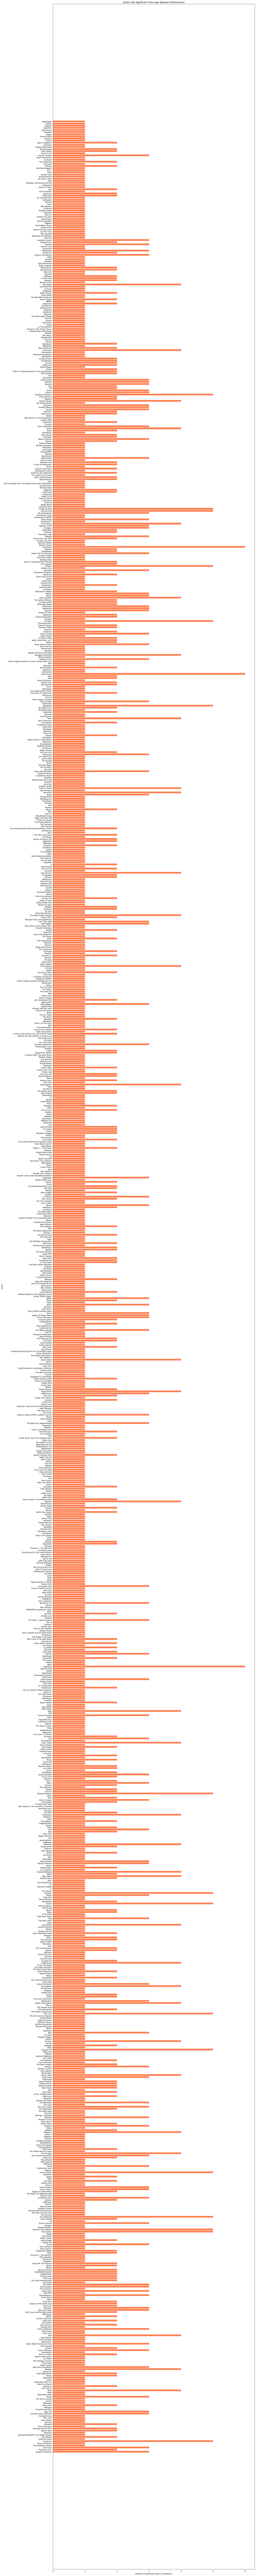

In [46]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported for plotting

# Check if there are any artists with comebacks (i.e., significant gaps in performances)
if artists_with_comebacks:
    # Visualizing the number of gaps (comebacks) per artist
    # Create a list of artist names from the keys of the artists_with_comebacks dictionary
    artists = list(artists_with_comebacks.keys())
    
    # Create a list of the number of significant gaps for each artist (the length of the "gaps" list for each artist)
    gaps_count = [len(details["gaps"]) for details in artists_with_comebacks.values()]

    # Create a horizontal bar chart to show the number of significant gaps (comebacks) for each artist
    plt.figure(figsize=(20, 200))  # Adjusted figure size (width, height) to accommodate long artist names

    # Create the horizontal bar chart, with artist names on the y-axis and the number of gaps on the x-axis
    plt.barh(artists, gaps_count, color='coral')  # Color of the bars is set to 'coral'

    # Set the labels and title for the plot
    plt.xlabel('Number of Significant Gaps (Comebacks)')  # Label for the x-axis
    plt.ylabel('Artist')  # Label for the y-axis
    plt.title('Artists with Significant Time Gaps Between Performances')  # Title of the chart

    # Rotate artist names to avoid overlapping text and improve readability
    plt.yticks(rotation=0)  # Artist names will be displayed horizontally (you can also try 90 or 45 for other angles)

    # Automatically adjust subplots to ensure there is enough space around the labels
    plt.tight_layout()  # Ensures everything fits neatly within the figure

    # Display the chart
    plt.show()

else:
    # If there are no artists with comebacks, print a message
    print("No artists with significant time gaps (comebacks) found.")
